Full Name: Nguyễn Đỗ Quang

Student ID: 20520720

**Experiment Requirements (for all datasets)**
- Train - test splitting ratio = 7:3.
- Random_state = 'Your Student ID'.
- Experiment with **Gradient Descent** (*max_iter = 200*, *learning_rate (eta)* is set by yourself) and **Normal Equation**.
- Visualize the cost trend (only for Gradient Descent)
- Evaluation Metric: **R2 score**.
- After completing all requirements, click on ‘Runtime' and choose ‘Restart and run all'.
- If the code is run without any errors (and the results are the same as before re-running), download the .ipybn file and submit. 
Otherwise, check the code carefully.


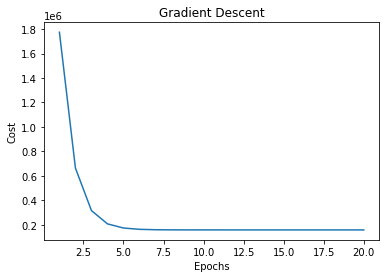

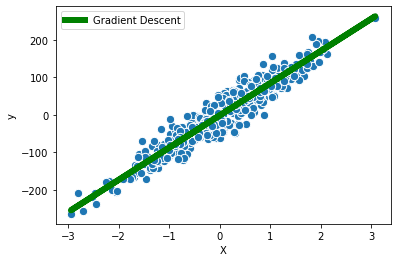

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
class LinearRegression_GD:
    def __init__(self,eta=0.005,max_iter=20,random_state = 20520720):
        self.eta = eta
        self.max_iter = max_iter
        self.random_state = random_state
        self.w = None
        self.costs = []

    def predict(self,X):
        return X@self.w[1:] +self.w[0]

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.costs = [ ]
        for n_iters in range (self.max_iter):
            y_pred = self.predict(X)
            diff = y - y_pred
            self.w[0] += self.eta * np.sum(diff)
            self.w[1:] += self.eta * np.dot(X.T, diff)
            cost = np.sum(diff ** 2) / 2
            self.costs.append(cost)

reg_GD = LinearRegression_GD(eta=0.001, max_iter=20,random_state=42)
X,y = make_regression(n_samples=500,n_features=1, n_informative=1,noise=25,random_state=20520720)

reg_GD = LinearRegression_GD(eta=0.001, max_iter=20,random_state=20520720)
reg_GD.fit(X, y)

plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

plt.scatter(X, y, facecolor='tab:blue', edgecolor='white', s=70)
plt.plot(X, reg_GD.predict(X), color='green', lw=6, label='Gradient Descent')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


# Fish Dataset

🐟🐟 **Dataset Information (fish.csv)** 🐟🐟
- Weight: Weight of fish in gram
- Length1: Vertical length in cm
- Length2: Diagonal length in cm
- Length3: Cross length in cm
- Height: Height in cm
- Width: Diagonal width in cm

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to estimate the **weight** of fish.


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in Data Preprocessing tutorial file.

***Class gradient descent***

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

fishDF = pd.read_csv('fish.csv')
X = fishDF.iloc[:,1:]
y = fishDF.iloc[:,:1].values.ravel()
# Train test ratio 7:3
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20520720)
# Use feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  =sc.transform(X_test)

# Use stochatic gradient descent
from sklearn.linear_model import SGDRegressor
reg_SGD = SGDRegressor(max_iter=200,eta0=0.005,random_state=20520720)
reg_SGD.fit(X_train,y_train)
w_SDG = np.append(reg_SGD.intercept_,reg_SGD.coef_)
print(w_SDG)
# Use normal equation
from sklearn.linear_model import LinearRegression
reg_NE = LinearRegression()
reg_NE.fit(X_train,y_train)
w_NE=np.append(reg_NE.intercept_,reg_NE.coef_)
print(w_NE)
#
X.head()

[421.65402078  86.12711657  84.48774346  80.14431431  51.80185987
  76.20285449]
[ 422.22612613  774.57437085 -226.33587601 -307.65073137  125.00518523
   34.94031849]


,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340


In [16]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

y_pred_SGD = reg_SGD.predict(X_test)
y_pred_NE = reg_NE.predict(X_test)

print('Mean absolute error of SGD',round(MAE(y_test,y_pred_SGD),6))
print('Mean absolute error of NE',round(MAE(y_test,y_pred_NE),6))

print('Mean square error of SGD',round(MSE(y_test,y_pred_SGD),6))
print('Mean square error of NE',round(MSE(y_test,y_pred_NE),6))

print('R2 of SGD',round(R2(y_test,y_pred_SGD),6))
print('R2 of NE',round(R2(y_test,y_pred_SGD),6))

# print(y_pred_SGD)
# print(y_test)

Mean absolute error of SGD 95.597699
Mean absolute error of NE 92.850813
Mean square error of SGD 14548.482114
Mean square error of NE 13864.577171
R2 of SGD 0.837846
R2 of NE 0.837846


# Insurance Dataset

💰💰 **Dataset Information (insurance.csv)** 💰💰
- age: Age of primary beneficiary
- sex: Insurance contractor gender, female / male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoker / Non-smoker
- region: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest
- charges: Individual medical costs billed by health insurance

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to estimate the individual medical costs billed by health insurance ('**charges**')


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in the Data Preprocessing tutorial file.

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# Use OneHotEncoder to encode categorical data: sex, smoker, region
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,4,5])], remainder='passthrough')
insurance_data = pd.read_csv('insurance.csv')
insurance_data.head()

X = insurance_data.iloc[:,:-1]
X = np.array(ct.fit_transform(X))
y = insurance_data.iloc[:,-1:].values.ravel()

# Train test ratio 7:3
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20520720)
# Use feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  =sc.transform(X_test)

# Use stochatic gradient descent
reg_SGD = SGDRegressor(max_iter=200,eta0=0.005,random_state=20520720)
reg_SGD.fit(X_train,y_train)
w_SDG = np.append(reg_SGD.intercept_,reg_SGD.coef_)
print(w_SDG)
# Use normal equation
reg_NE = LinearRegression()
reg_NE.fit(X_train,y_train)
w_NE=np.append(reg_NE.intercept_,reg_NE.coef_)
print(w_NE)

[13211.60215453   -24.8385726     24.8385726  -4740.42971826
  4740.42971826   376.3448215     41.39874154  -354.9419864
   -55.78047219  3678.00925523  2069.5443981    521.23393597]
[ 1.32168072e+04 -1.28848344e+01  1.28848344e+01 -4.75969380e+03
  4.75969380e+03  3.64789112e+02  3.38854550e+01 -3.32832777e+02
 -5.92406797e+01  3.67400570e+03  2.07663284e+03  5.16063394e+02]


In [18]:
y_pred_SGD = reg_SGD.predict(X_test)
y_pred_NE = reg_NE.predict(X_test)

print('Mean absolute error of SGD',round(MAE(y_test,y_pred_SGD),6))
print('Mean absolute error of NE',round(MAE(y_test,y_pred_NE),6))

print('Mean square error of SGD',round(MSE(y_test,y_pred_SGD),6))
print('Mean square error of NE',round(MSE(y_test,y_pred_NE),6))

print('R2 of SGD',round(R2(y_test,y_pred_SGD),6))
print('R2 of NE',round(R2(y_test,y_pred_SGD),6))

Mean absolute error of SGD 4337.030864
Mean absolute error of NE 4333.041195
Mean square error of SGD 41369067.133034
Mean square error of NE 41293412.211716
R2 of SGD 0.727955
R2 of NE 0.727955


# Tesla Stock Dataset

📈📈 **Dataset Information (tesla_stock.csv)** 📈📈
- Open: The opening price of the stock
- High: The high price of that day
- Low: The low price of that day
- Close: The closed price of that day
- Volume: The amount of stocks traded during that day

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to predict the closing price of tesla stock ('**Close**')


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in the Data Preprocessing tutorial file.

In [19]:
# Code here
tesla = pd.read_csv('tesla_stock.csv')

# use concat to concatenate columns of data
X = np.concatenate([tesla.iloc[:,:-2],tesla.iloc[:,-1:]],axis=1)
# convert to numpy array and flatten
y = tesla.iloc[:,-2:-1].values.ravel()
print(X)
print(y)

#Train test ratio 7:3
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20520720)
# # Use feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  =sc.transform(X_test)

# Use stochatic gradient descent
from sklearn.linear_model import SGDRegressor
reg_SGD = SGDRegressor(max_iter=200,eta0=0.005,random_state=20520720)
reg_SGD.fit(X_train,y_train)
w_SDG = np.append(reg_SGD.intercept_,reg_SGD.coef_)
# print(w_SDG)
# # Use normal equation
reg_NE = LinearRegression()
reg_NE.fit(X_train,y_train)
w_NE=np.append(reg_NE.intercept_,reg_NE.coef_)
print(w_NE)

[[1.90000000e+01 2.50000000e+01 1.75400010e+01 1.87663000e+07]
 [2.57900010e+01 3.04200000e+01 2.32999990e+01 1.71871000e+07]
 [2.50000000e+01 2.59200000e+01 2.02700000e+01 8.21880000e+06]
 ...
 [6.32419983e+02 6.50880005e+02 6.18000000e+02 2.90057000e+07]
 [6.40000000e+02 6.53000000e+02 6.32520020e+02 1.57193000e+07]
 [6.73690002e+02 7.86140015e+02 6.73520020e+02 4.70650000e+07]]
[ 23.889999  23.83      21.959999 ... 640.809998 650.570007 780.      ]
[ 1.86607741e+02 -7.87705768e+01  1.10951992e+02  8.77460812e+01
 -1.60160582e-01]


In [20]:
y_pred_SGD = reg_SGD.predict(X_test)
y_pred_NE = reg_NE.predict(X_test)

print('Mean absolute error of SGD',round(MAE(y_test,y_pred_SGD),6))
print('Mean absolute error of NE',round(MAE(y_test,y_pred_NE),6))

print('Mean square error of SGD',round(MSE(y_test,y_pred_SGD),6))
print('Mean square error of NE',round(MSE(y_test,y_pred_NE),6))

print('R2 of SGD',round(R2(y_test,y_pred_SGD),6))
print('R2 of NE',round(R2(y_test,y_pred_SGD),6))

Mean absolute error of SGD 2.213527
Mean absolute error of NE 1.339742
Mean square error of SGD 11.376593
Mean square error of NE 3.846152
R2 of SGD 0.999173
R2 of NE 0.999173
